In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, classification_report, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, Binarizer
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
tc_prep = pd.read_csv('tc_prep.csv')

In [4]:
tc_prep.head().T

,0,1,2,3,4
Survived,0.00,1.0000,1.000,1.0,0.00
Fare,7.25,71.2833,7.925,53.1,8.05
Family,1.00,1.0000,0.000,1.0,0.00
Sex_female,0.00,1.0000,1.000,1.0,0.00
Sex_male,1.00,0.0000,0.000,0.0,1.00
Embarked_C,0.00,1.0000,0.000,0.0,0.00
Embarked_Q,0.00,0.0000,0.000,0.0,0.00
Embarked_S,1.00,0.0000,1.000,1.0,1.00
Pclass_1,0.00,1.0000,0.000,1.0,0.00
Pclass_2,0.00,0.0000,0.000,0.0,0.00


In [21]:
scaler = StandardScaler()
tc_prep['Fare'] = scaler.fit_transform(tc_prep['Fare'].to_numpy().reshape(-1, 1))

In [22]:
tc_prep.head().T

,0,1,2,3,4
Survived,0.000000,1.000000,1.000000,1.00000,0.000000
Fare,-0.502445,0.786845,-0.488854,0.42073,-0.486337
Family,1.000000,1.000000,0.000000,1.00000,0.000000
Sex_female,0.000000,1.000000,1.000000,1.00000,0.000000
Sex_male,1.000000,0.000000,0.000000,0.00000,1.000000
Embarked_C,0.000000,1.000000,0.000000,0.00000,0.000000
Embarked_Q,0.000000,0.000000,0.000000,0.00000,0.000000
Embarked_S,1.000000,0.000000,1.000000,1.00000,1.000000
Pclass_1,0.000000,1.000000,0.000000,1.00000,0.000000
Pclass_2,0.000000,0.000000,0.000000,0.00000,0.000000


In [27]:
X_train, X_val_test = train_test_split(tc_prep, test_size=0.4, random_state=0)
X_val, X_test = train_test_split(X_val_test, test_size=0.5, random_state=0 )

y_train = X_train['Survived']
y_test = X_test['Survived']
y_val = X_val['Survived']

del X_train['Survived']
del X_test['Survived']
del X_val['Survived']

accuracy 0.7821229050279329
f1 0.6929133858267716
roc 0.7650951199338296


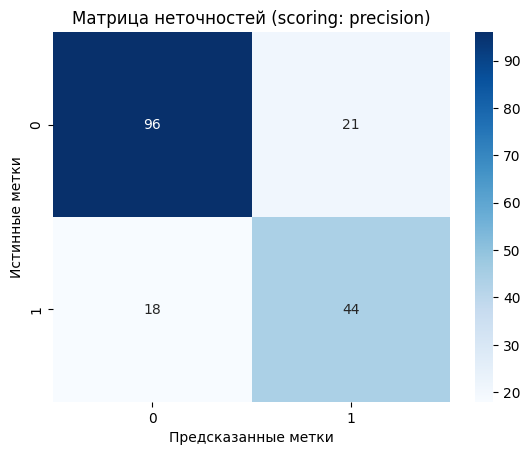

In [28]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(f'accuracy {gnb.score(X_test, y_test)}')
print(f'f1 {f1_score(y_test, y_pred)}')
print(f'roc {roc_auc_score(y_test, y_pred)}')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица неточностей (scoring: precision)')
plt.show()

In [13]:
tc_prep.head().T

,0,1,2,3,4
Survived,0.000000,1.000000,1.000000,1.00000,0.000000
Fare,-0.502445,0.786845,-0.488854,0.42073,-0.486337
Family,1.000000,1.000000,0.000000,1.00000,0.000000
Sex_female,0.000000,1.000000,1.000000,1.00000,0.000000
Sex_male,1.000000,0.000000,0.000000,0.00000,1.000000
Embarked_C,0.000000,1.000000,0.000000,0.00000,0.000000
Embarked_Q,0.000000,0.000000,0.000000,0.00000,0.000000
Embarked_S,1.000000,0.000000,1.000000,1.00000,1.000000
Pclass_1,0.000000,1.000000,0.000000,1.00000,0.000000
Pclass_2,0.000000,0.000000,0.000000,0.00000,0.000000


In [16]:
binarizer = Binarizer(threshold=0)
Fare_binary = binarizer.fit_transform(tc_prep['Fare'].to_numpy().reshape(-1, 1))
tc_prep['Fare'] = Fare_binary
tc_prep.head().T

,0,1,2,3,4
Survived,0.0,1.0,1.0,1.0,0.0
Fare,0.0,1.0,0.0,1.0,0.0
Family,1.0,1.0,0.0,1.0,0.0
Sex_female,0.0,1.0,1.0,1.0,0.0
Sex_male,1.0,0.0,0.0,0.0,1.0
Embarked_C,0.0,1.0,0.0,0.0,0.0
Embarked_Q,0.0,0.0,0.0,0.0,0.0
Embarked_S,1.0,0.0,1.0,1.0,1.0
Pclass_1,0.0,1.0,0.0,1.0,0.0
Pclass_2,0.0,0.0,0.0,0.0,0.0


In [17]:
X_train, X_val_test = train_test_split(tc_prep, test_size=0.4, random_state=0)
X_val, X_test = train_test_split(X_val_test, test_size=0.5, random_state=0 )

y_train = X_train['Survived']
y_test = X_test['Survived']
y_val = X_val['Survived']

del X_train['Survived']
del X_test['Survived']
del X_val['Survived']

accuracy 0.7821229050279329
f1 0.6929133858267716
roc 0.7650951199338296


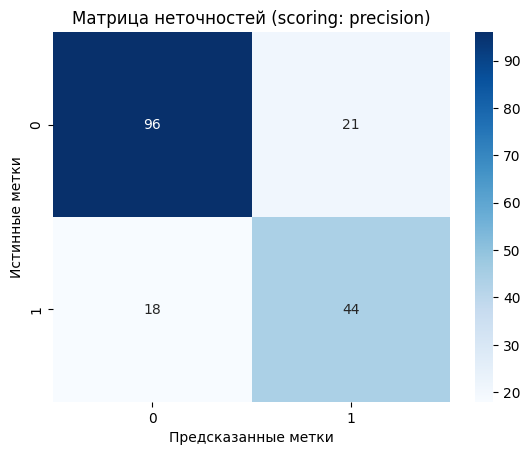

In [29]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)
print(f'accuracy {gnb.score(X_test, y_test)}')
print(f'f1 {f1_score(y_test, y_pred)}')
print(f'roc {roc_auc_score(y_test, y_pred)}')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица неточностей (scoring: precision)')
plt.show()

In [38]:
tc_prep = pd.read_csv('tc_prep.csv')
tc_fare = tc_prep['Fare']
tc_cat = tc_prep.drop(columns=['Fare'])

In [39]:
X_train_gnb, X_val_test_gnb = train_test_split(tc_fare, test_size=0.4, random_state=0)
X_val_gnb, X_test_gnb = train_test_split(X_val_test_gnb, test_size=0.5, random_state=0 )

In [42]:
X_train_bnb, X_val_test_bnb = train_test_split(tc_cat, test_size=0.4, random_state=0)
X_val_bnb, X_test_bnb = train_test_split(X_val_test_bnb, test_size=0.5, random_state=0 )

y_train_bnb = X_train_bnb['Survived']
y_test_bnb = X_test_bnb['Survived']
y_val_bnb = X_val_bnb['Survived']

del X_train_bnb['Survived']
del X_test_bnb['Survived']
del X_val_bnb['Survived']

In [53]:
bnb = BernoulliNB()
bnb.fit(X_train_bnb, y_train_bnb)
y_pred_bnb = bnb.predict(X_test_bnb)

gnb = GaussianNB()
gnb.fit(X_train_gnb.to_numpy().reshape(-1, 1), y_train_bnb)
y_pred_gnb = gnb.predict(X_test_gnb.to_numpy().reshape(-1, 1))

print(f'accuracy bnb {bnb.score(X_test_bnb, y_test_bnb)}')
print(f'accuracy gnb {gnb.score(X_test_gnb.to_numpy().reshape(-1, 1), y_test_bnb)}')

print(f'f1 bnb {f1_score(y_test_bnb, y_pred_bnb)}')
print(f'f1 gnb {f1_score(y_test_bnb, y_pred_gnb)}')

accuracy bnb 0.770949720670391
accuracy gnb 0.7094972067039106
f1 bnb 0.6666666666666666
f1 gnb 0.38095238095238093
